In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

#### Q8
This question involves the use of simple linear regression on the Auto
data set.

In [2]:
# Loading and cleaning the data
Auto = load_data('Auto')
Auto.replace('?',np.nan, inplace=True)
Auto = Auto.dropna()

(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

In [3]:
design = MS(['horsepower'])
X = design.fit_transform(Auto)
y = Auto['mpg']

model=sm.OLS(y,X)
results=model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


i. Is there a relationship between the predictor and the response?
> Yes, since the p value is small.

ii. How strong is the relationship between the predictor and the response?
> A unit increase in horsepower is associated with -0.1578 decrease in mpg.

iii. Is the relationship between the predictor and the response positive or negative?
> Negative.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [4]:
new_df = pd.DataFrame({'horsepower':[98]})
new_X = design.transform(new_df)

new_predictions = results.get_prediction(new_X);
print("The predicted value of mpg for a horsepower of 98 is {0}".format(new_predictions.predicted_mean[0]))
print("The associated 95% confidence interval is {0}".format(new_predictions.conf_int(alpha=0.05)[0]))
print("The associated 95% prediction interval is {0}".format(new_predictions.conf_int(obs=True,alpha=0.05)[0]))

The predicted value of mpg for a horsepower of 98 is 24.467077152512427
The associated 95% confidence interval is [23.97307896 24.96107534]
The associated 95% prediction interval is [14.80939607 34.12475823]


(b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

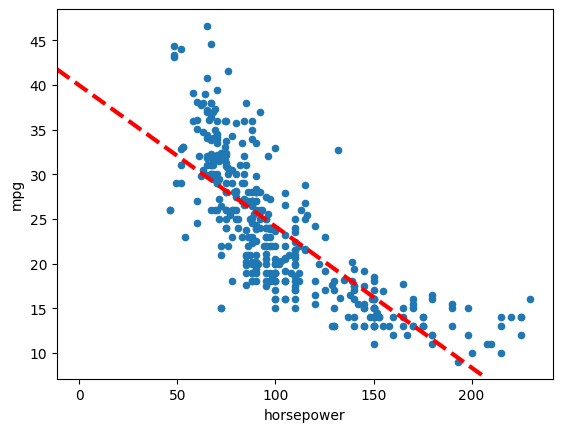

In [5]:
ax = Auto.plot.scatter('horsepower','mpg')
intercept = results.params.iloc[0]
slope = results.params.iloc[1]
ax.axline(xy1=(0,intercept), slope=slope, linewidth=3, linestyle='dashed', color='r');

(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

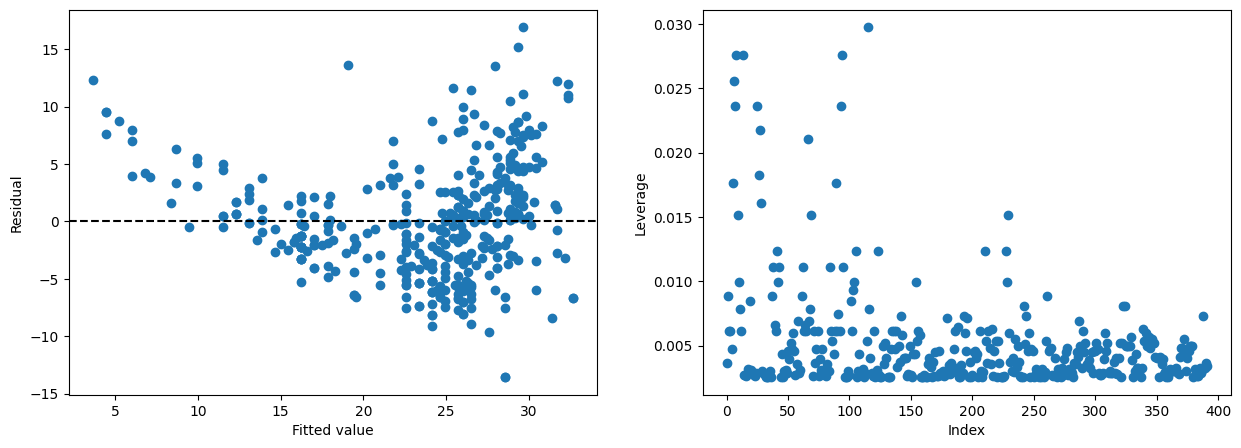

In [6]:
fig, ax = subplots(nrows=1,ncols=2,figsize=(15,5))

# Analysis of residuals  & outliers 
ax[0].scatter(results.fittedvalues, results.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='k', ls='--');

# Analysis of leverage
infl = results.get_influence()
ax[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

>- The residuals have a 'U' shape indicating that the relationship may be non-linear.
>- There seem to be many outliers with a high leverage value, we need to include more parameters.  

#### Q10 
This question should be answered using the Carseats data set.

In [7]:
Carseats = load_data('Carseats')
print("There are {0} missing values".format(Carseats.isnull().sum().sum()))
Carseats.head()

There are 0 missing values


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

(b) Provide an interpretation of each coefficient in the model. Be careful some of the variables in the model are qualitative!

In [8]:
X = MS(['Price','Urban','US']).fit_transform(Carseats)
y = Carseats['Sales']
model1 = sm.OLS(y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


>- In the absence of any any predictors, the Sales are 13,000 \$.
>- A unit increase in price of a carseat is associated with -545 \$ decrease in Sales.
>- The locality has no effect on the Sales since the p value is quite large. 
>- A store being in the US is associated with a 1200 \$ increase in Sales. 

(c)  Write out the model in equation form, being careful to handle the qualitative variables properly
>- $\textcolor{blue}{Sales}= 13.0435 - 0.0545 \cdot \textcolor{blue}{Price} - 0.0219 \cdot \textcolor{blue}{Urban (0/1)} + 1.2006 \cdot \textcolor{blue}{US (0/1)}$
>- This leads to 4 permutations based on whether or not the carseat is sold in an urban location & whether or not the store is the US.

(d) For which of the predictors can you reject the null hypothesis $ H_{0} : \beta_{j} = 0$?
> The null hypothesis can be rejected for the predictors Price and US. 

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [9]:
X_subset = MS(['Price','US']).fit_transform(Carseats)
model2 = sm.OLS(y,X_subset)
results2 = model2.fit()
df = summarize(results2)
df

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


(f) How well do the models in (a) and (e) fit the data?

In [10]:
print("The first model has an R^2 value of {0} and an RSE of {1}".format(results1.rsquared,np.sqrt(results1.scale)))
print("The second model has an R^2 value of {0} and an RSE of {1}".format(results2.rsquared,np.sqrt(results2.scale)))

The first model has an R^2 value of 0.23927539218405525 and an RSE of 2.4724924402701642
The second model has an R^2 value of 0.23926288842678567 and an RSE of 2.469396800574444


> The exclusion of the locality barely makes a difference on the accuracy of the model.  

(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [11]:
for index,row in df.iterrows():
    print(u"The 95% confidence interval for {0} is {1} \u00B1 2*{2}".format(index,row['coef'],row['std err']))

The 95% confidence interval for intercept is 13.0308 ± 2*0.631
The 95% confidence interval for Price is -0.0545 ± 2*0.005
The 95% confidence interval for US[Yes] is 1.1996 ± 2*0.258


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

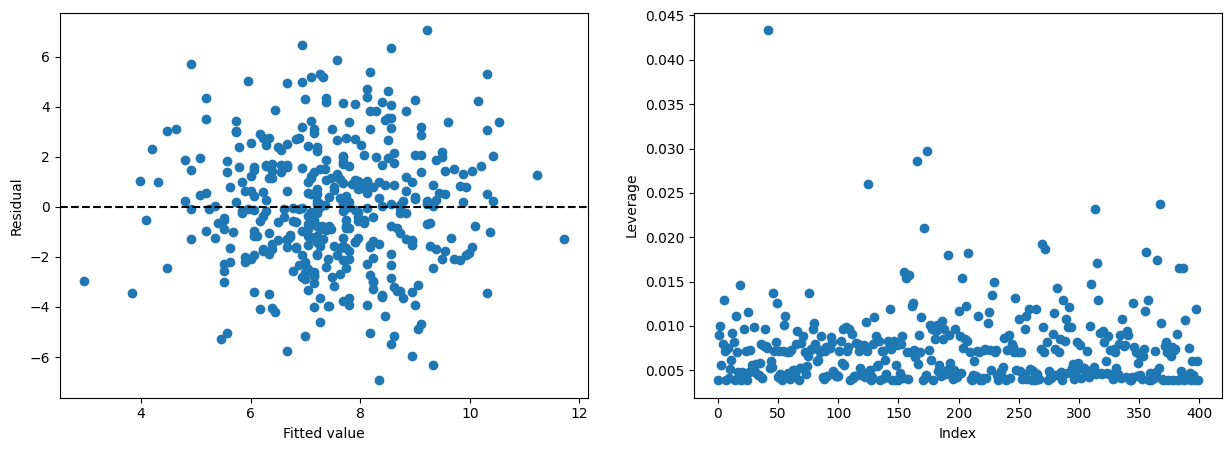

In [12]:
fig, ax = subplots(nrows=1,ncols=2,figsize=(15,5))

# Analysis of residuals  & outliers 
ax[0].scatter(results2.fittedvalues, results2.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residual')
ax[0].axhline(0, c='k', ls='--');

# Analysis of leverage
infl = results2.get_influence()
ax[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag);

>- There doesn't seem to be any discernible pattern, indicating a linear relationship.
>- There also don't seem to be any outliers or high leverage points, save one. 